In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from fastai.text import *
import os
import seaborn as sns
import readability
import re


In [7]:
%matplotlib inline

In [4]:
os.chdir("K:/VWTA/II/cap/set_amazon")

In [5]:
df= pd.read_pickle("df_1.pkl")

In [82]:
mpl.style.use("seaborn-whitegrid")
params = {'axes.titlesize':'32',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14',
          'legend.loc':'upper right'}
mpl.rcParams.update(params)


In [41]:
df.name.nunique()

26

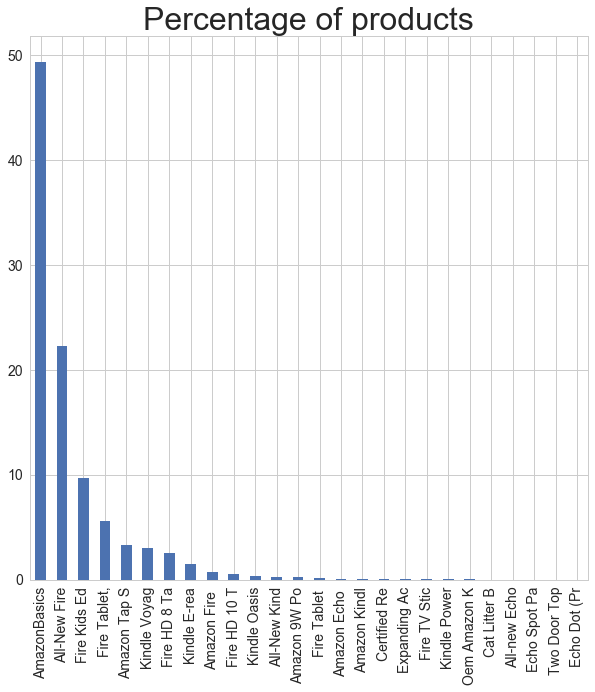

In [45]:
(df.name.value_counts(normalize=True)*100).plot(kind="bar",figsize=(10,10),title="Percentage of products")

#mpl.style.use("seaborn-white")
## looks categorical here, see if cutting of names does not go too far

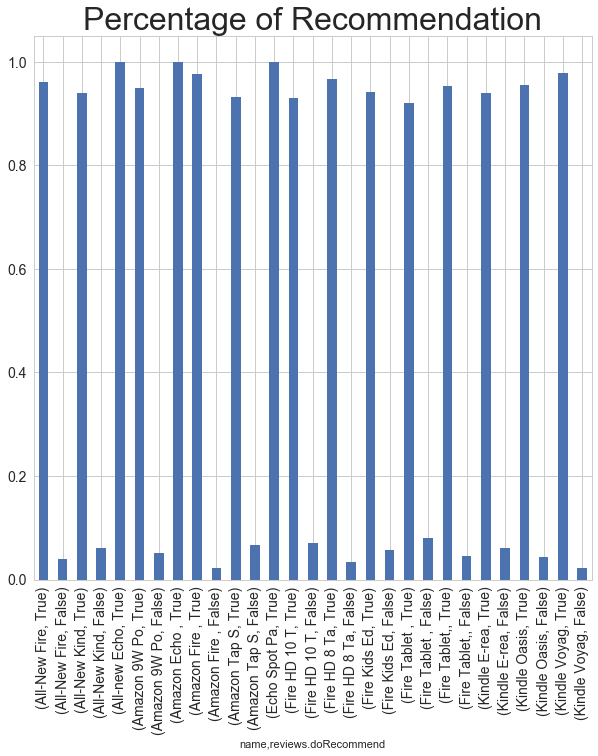

In [62]:
df.groupby("name")["reviews.doRecommend"].value_counts(normalize=True).plot(kind="bar",figsize=(10,10),title="Percentage of Recommendation")

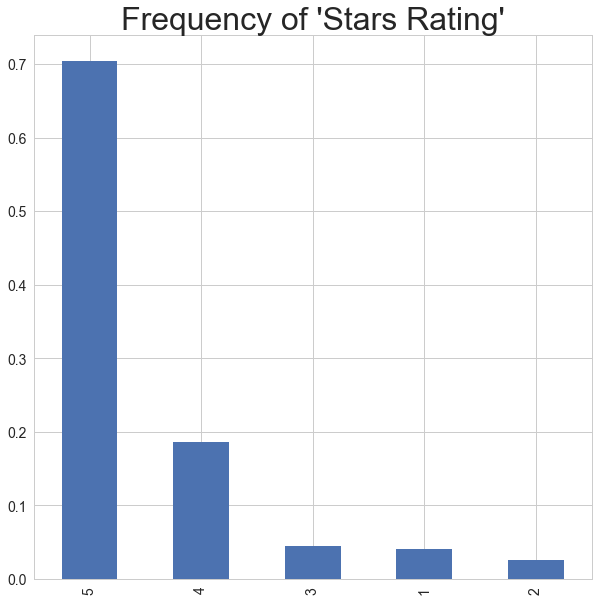

In [65]:
df["reviews.rating"].value_counts(normalize=True).plot(kind="bar",figsize=(10,10),title="Frequency of 'Stars Rating'")

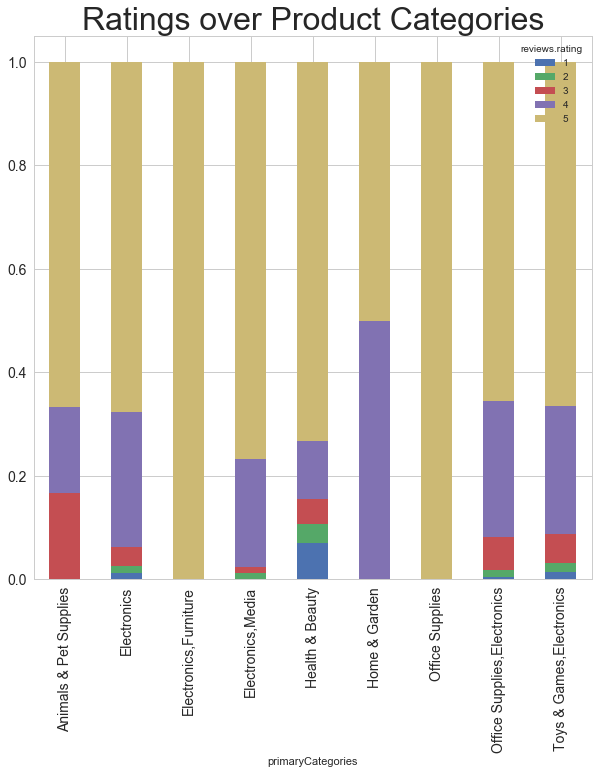

In [95]:
df.groupby("primaryCategories")["reviews.rating"].value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,figsize=(10,10),title="Ratings over Product Categories")

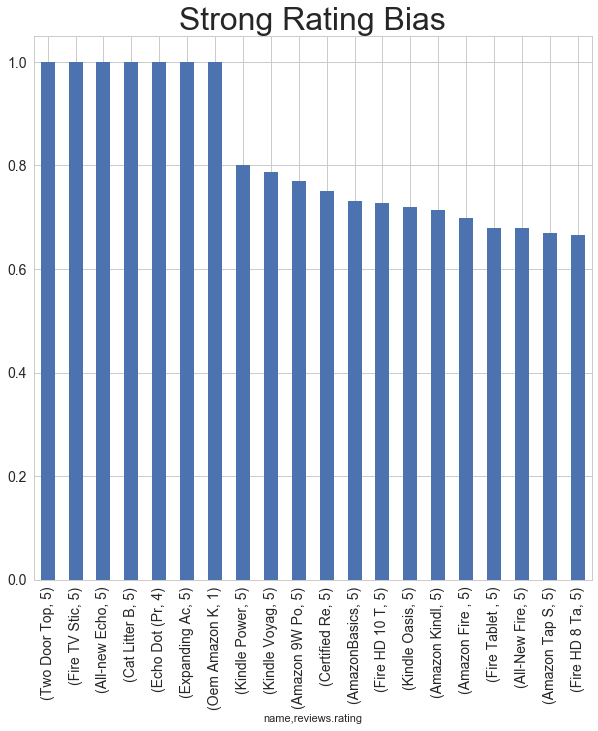

In [93]:
### check rating outliers 
df.groupby("name")["reviews.rating"].value_counts(normalize=True).sort_values(ascending=False)[:20].plot(kind="bar",figsize=(10,10),title="Strong Rating Bias")

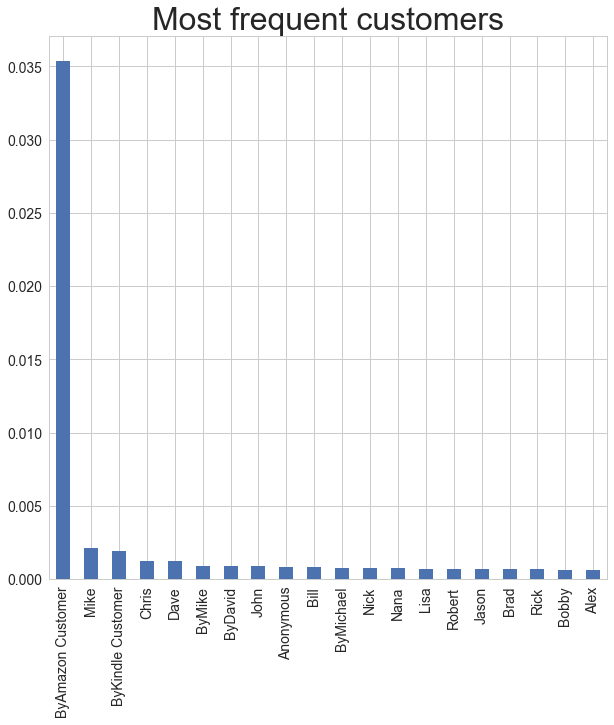

In [100]:
df["reviews.username"].value_counts(normalize=True)[:20].plot(kind="bar",figsize=(10,10),title="Most frequent customers")

In [109]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'title_character_len', 'text_character_len', 'title_word_len',
       'text_word_len', 'text_sentence_len', 'text_subsentences', 'neg', 'neu',
       'pos', 'compound'],
      dtype='object')

reviews.rating
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

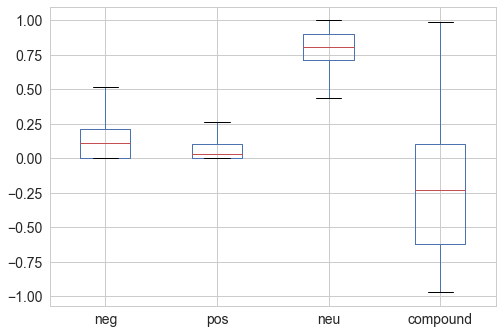

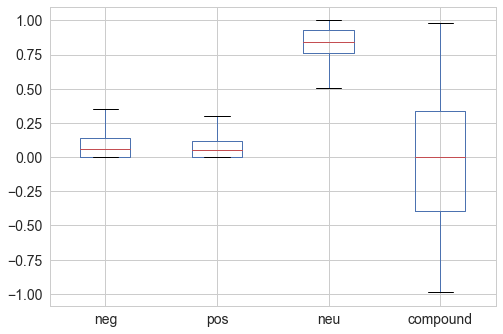

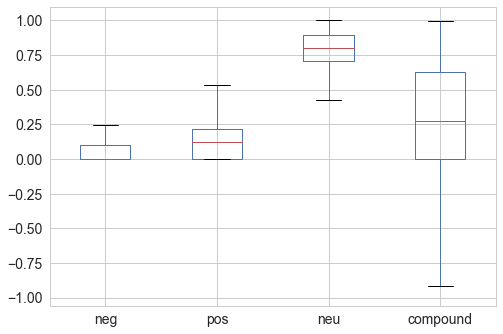

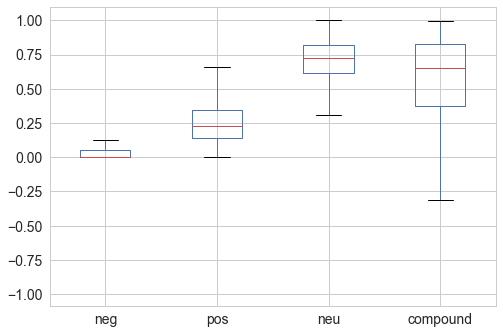

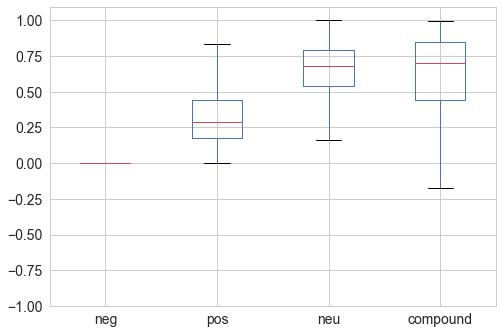

In [127]:
df.groupby("reviews.rating")[["neg","pos","neu","compound"]].plot(kind="box",stacked=True)

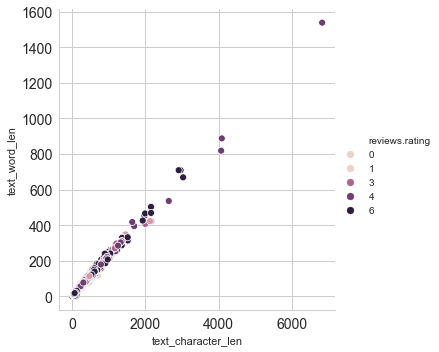

In [145]:
sns.relplot(x="text_character_len",y="text_word_len",hue="reviews.rating",data=df)



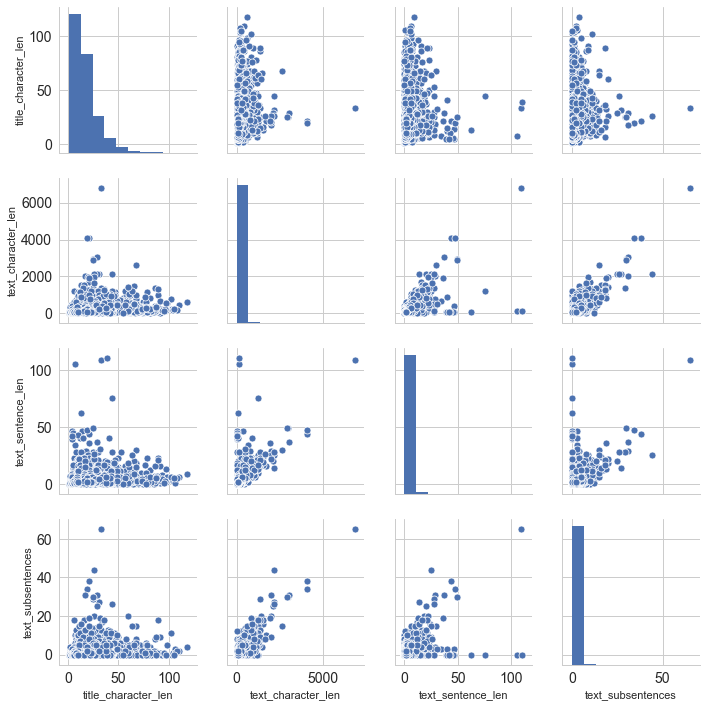

In [149]:
#sns.relplot("title_character_len","text_character_len",data=df)
sns.pairplot(df[["title_character_len","text_character_len","text_sentence_len","text_subsentences"]])


reviews.rating
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

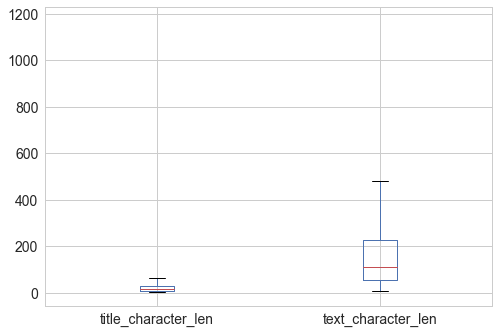

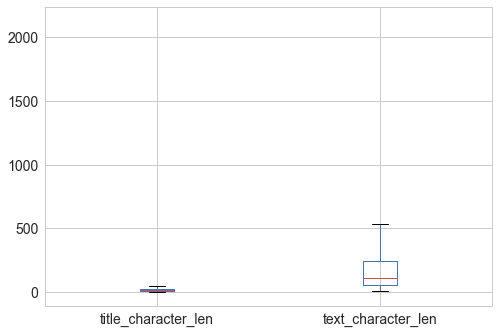

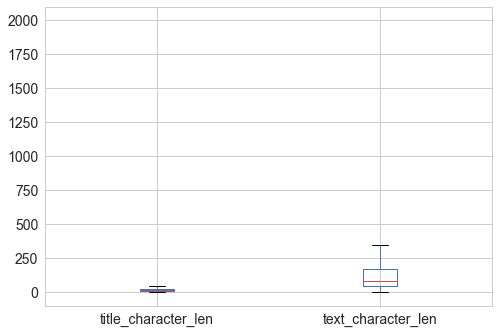

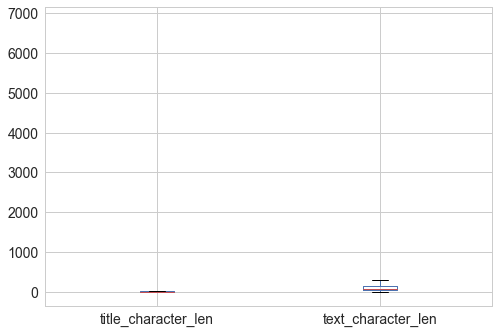

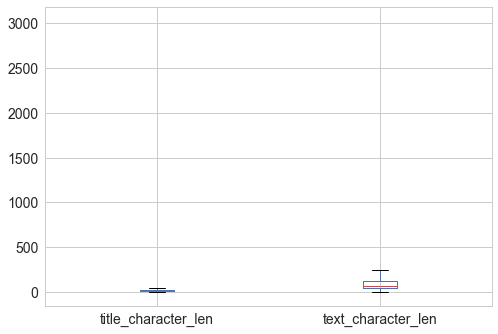

In [153]:
df.groupby("reviews.rating")[["title_character_len","text_character_len"]].plot(kind="box")

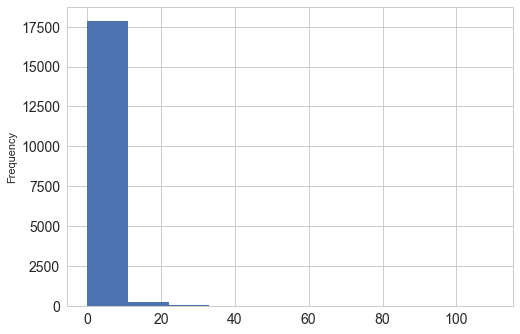

In [157]:
df.text_sentence_len.plot(kind="hist")

In [158]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'title_character_len', 'text_character_len', 'title_word_len',
       'text_word_len', 'text_sentence_len', 'text_subsentences', 'neg', 'neu',
       'pos', 'compound'],
      dtype='object')